In [ ]:
!pip install streamlit


In [ ]:
!pip install shap


In [ ]:
!git clone !git clone https://github.com/Hunk0109/INFO6105_Capstone-project_HS/blob/main/HousingData.csv



fatal: Too many arguments.

usage: git clone [<options>] [--] <repo> [<dir>]

    -v, --verbose         be more verbose
    -q, --quiet           be more quiet
    --progress            force progress reporting
    --reject-shallow      don't clone shallow repository
    -n, --no-checkout     don't create a checkout
    --bare                create a bare repository
    --mirror              create a mirror repository (implies bare)
    -l, --local           to clone from a local repository
    --no-hardlinks        don't use local hardlinks, always copy
    -s, --shared          setup as shared repository
    --recurse-submodules[=<pathspec>]
                          initialize submodules in the clone
    --recursive ...       alias of --recurse-submodules
    -j, --jobs <n>        number of submodules cloned in parallel
    --template <template-directory>
                          directory from which templates will be used
    --reference <repo>    reference repository
    --refere

In [27]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
# Set working directory
%cd /content/drive/MyDrive/
df = pd.read_csv('HousingData.csv')

/content/drive/MyDrive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


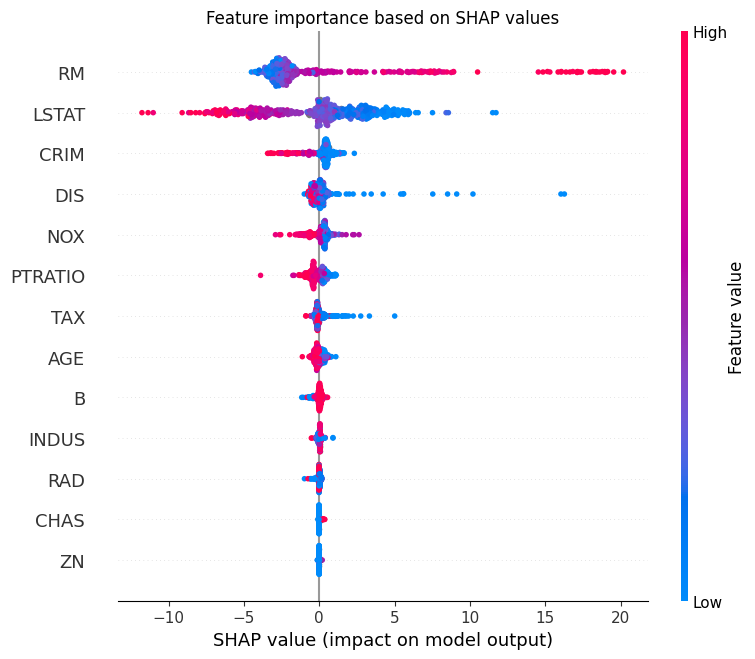

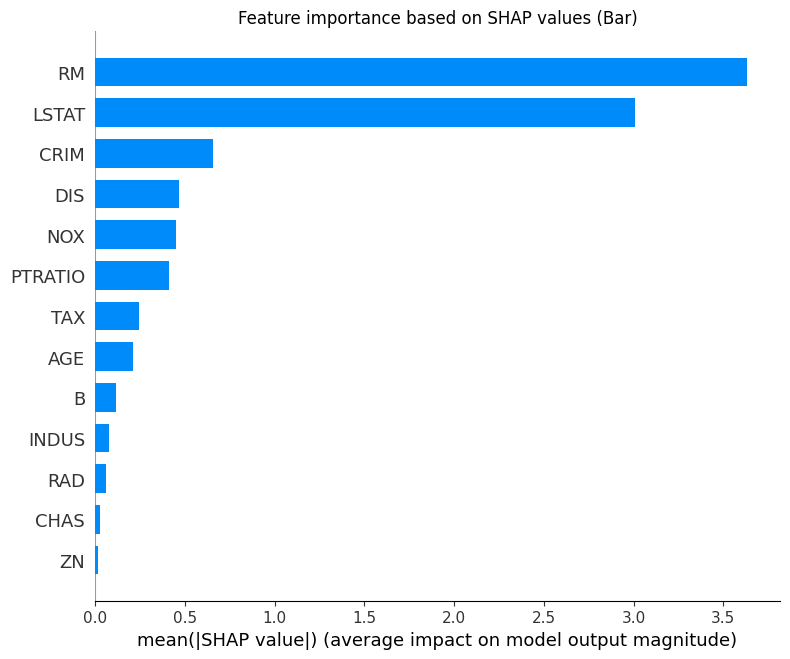

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [33]:
import streamlit as st
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Load the CSV file into a DataFrame
boston = pd.read_csv('HousingData.csv')

st.write("""
# Boston House Price Prediction App

This app predicts the **Boston House Price**!
""")
st.write('---')

X = boston.drop("MEDV", axis=1)
Y = boston["MEDV"]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Sidebar
# Header of Specify Input Parameters
st.sidebar.header('Specify Input Parameters')

def user_input_features():
    CRIM = st.sidebar.slider('CRIM', float(X_imputed[:,0].min()), float(X_imputed[:,0].max()), float(X_imputed[:,0].mean()))
    ZN = st.sidebar.slider('ZN', float(X_imputed[:,1].min()), float(X_imputed[:,1].max()), float(X_imputed[:,1].mean()))
    INDUS = st.sidebar.slider('INDUS', float(X_imputed[:,2].min()), float(X_imputed[:,2].max()), float(X_imputed[:,2].mean()))
    CHAS = st.sidebar.slider('CHAS', float(X_imputed[:,3].min()), float(X_imputed[:,3].max()), float(X_imputed[:,3].mean()))
    NOX = st.sidebar.slider('NOX', float(X_imputed[:,4].min()), float(X_imputed[:,4].max()), float(X_imputed[:,4].mean()))
    RM = st.sidebar.slider('RM', float(X_imputed[:,5].min()), float(X_imputed[:,5].max()), float(X_imputed[:,5].mean()))
    AGE = st.sidebar.slider('AGE', float(X_imputed[:,6].min()), float(X_imputed[:,6].max()), float(X_imputed[:,6].mean()))
    DIS = st.sidebar.slider('DIS', float(X_imputed[:,7].min()), float(X_imputed[:,7].max()), float(X_imputed[:,7].mean()))
    RAD = st.sidebar.slider('RAD', float(X_imputed[:,8].min()), float(X_imputed[:,8].max()), float(X_imputed[:,8].mean()))
    TAX = st.sidebar.slider('TAX', float(X_imputed[:,9].min()), float(X_imputed[:,9].max()), float(X_imputed[:,9].mean()))
    PTRATIO = st.sidebar.slider('PTRATIO', float(X_imputed[:,10].min()), float(X_imputed[:,10].max()), float(X_imputed[:,10].mean()))
    B = st.sidebar.slider('B', float(X_imputed[:,11].min()), float(X_imputed[:,11].max()), float(X_imputed[:,11].mean()))
    LSTAT = st.sidebar.slider('LSTAT', float(X_imputed[:,12].min()), float(X_imputed[:,12].max()), float(X_imputed[:,12].mean()))
    data = {'CRIM': CRIM,
            'ZN': ZN,
            'INDUS': INDUS,
            'CHAS': CHAS,
            'NOX': NOX,
            'RM': RM,
            'AGE': AGE,
            'DIS': DIS,
            'RAD': RAD,
            'TAX': TAX,
            'PTRATIO': PTRATIO,
            'B': B,
            'LSTAT': LSTAT}
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()

# Main Panel

# Print specified input parameters
st.header('Specified Input parameters')
st.write(df)
st.write('---')

# Build Regression Model
model = RandomForestRegressor()
model.fit(X_imputed, Y)
# Apply Model to Make Prediction
prediction = model.predict(df)

st.header('Prediction of MEDV')
st.write(prediction)
st.write('---')

# Explaining the model's predictions using SHAP values
# https://github.com/slundberg/shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_imputed)

st.header('Feature Importance')
plt.title('Feature importance based on SHAP values')
shap.summary_plot(shap_values, X)
st.pyplot(bbox_inches='tight')
st.write('---')

plt.title('Feature importance based on SHAP values (Bar)')
shap.summary_plot(shap_values, X, plot_type="bar")
st.pyplot(bbox_inches='tight')


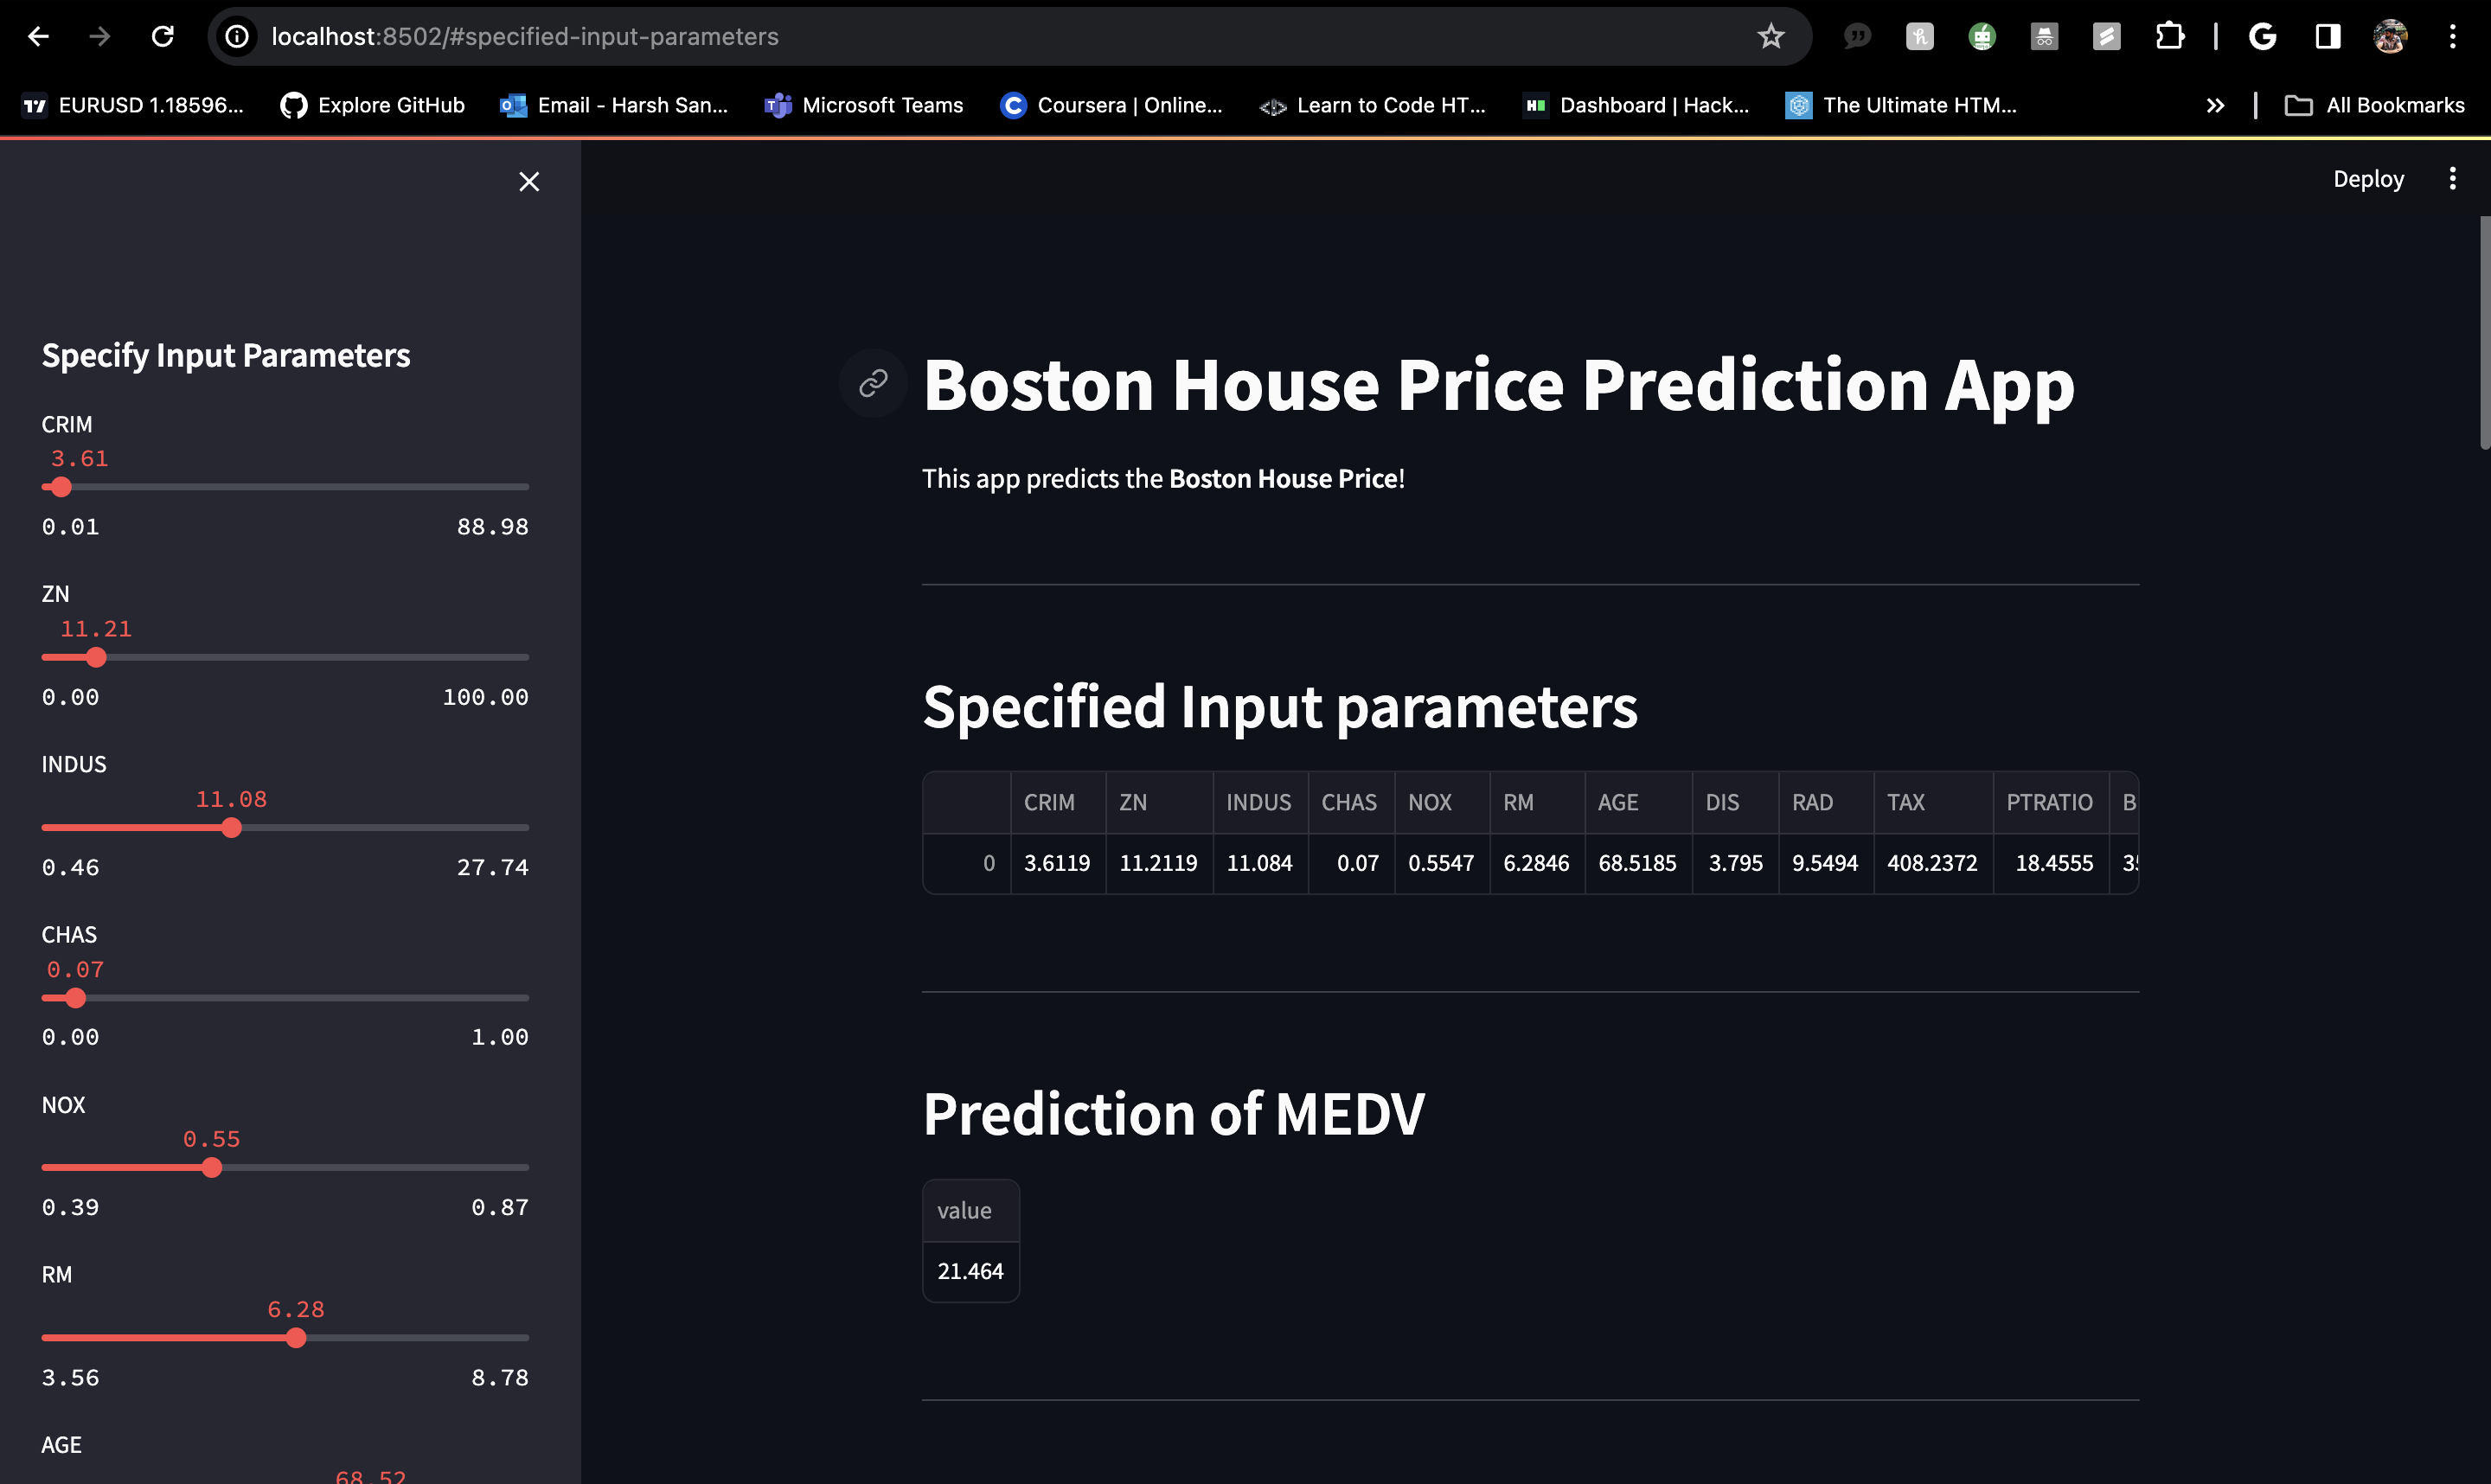

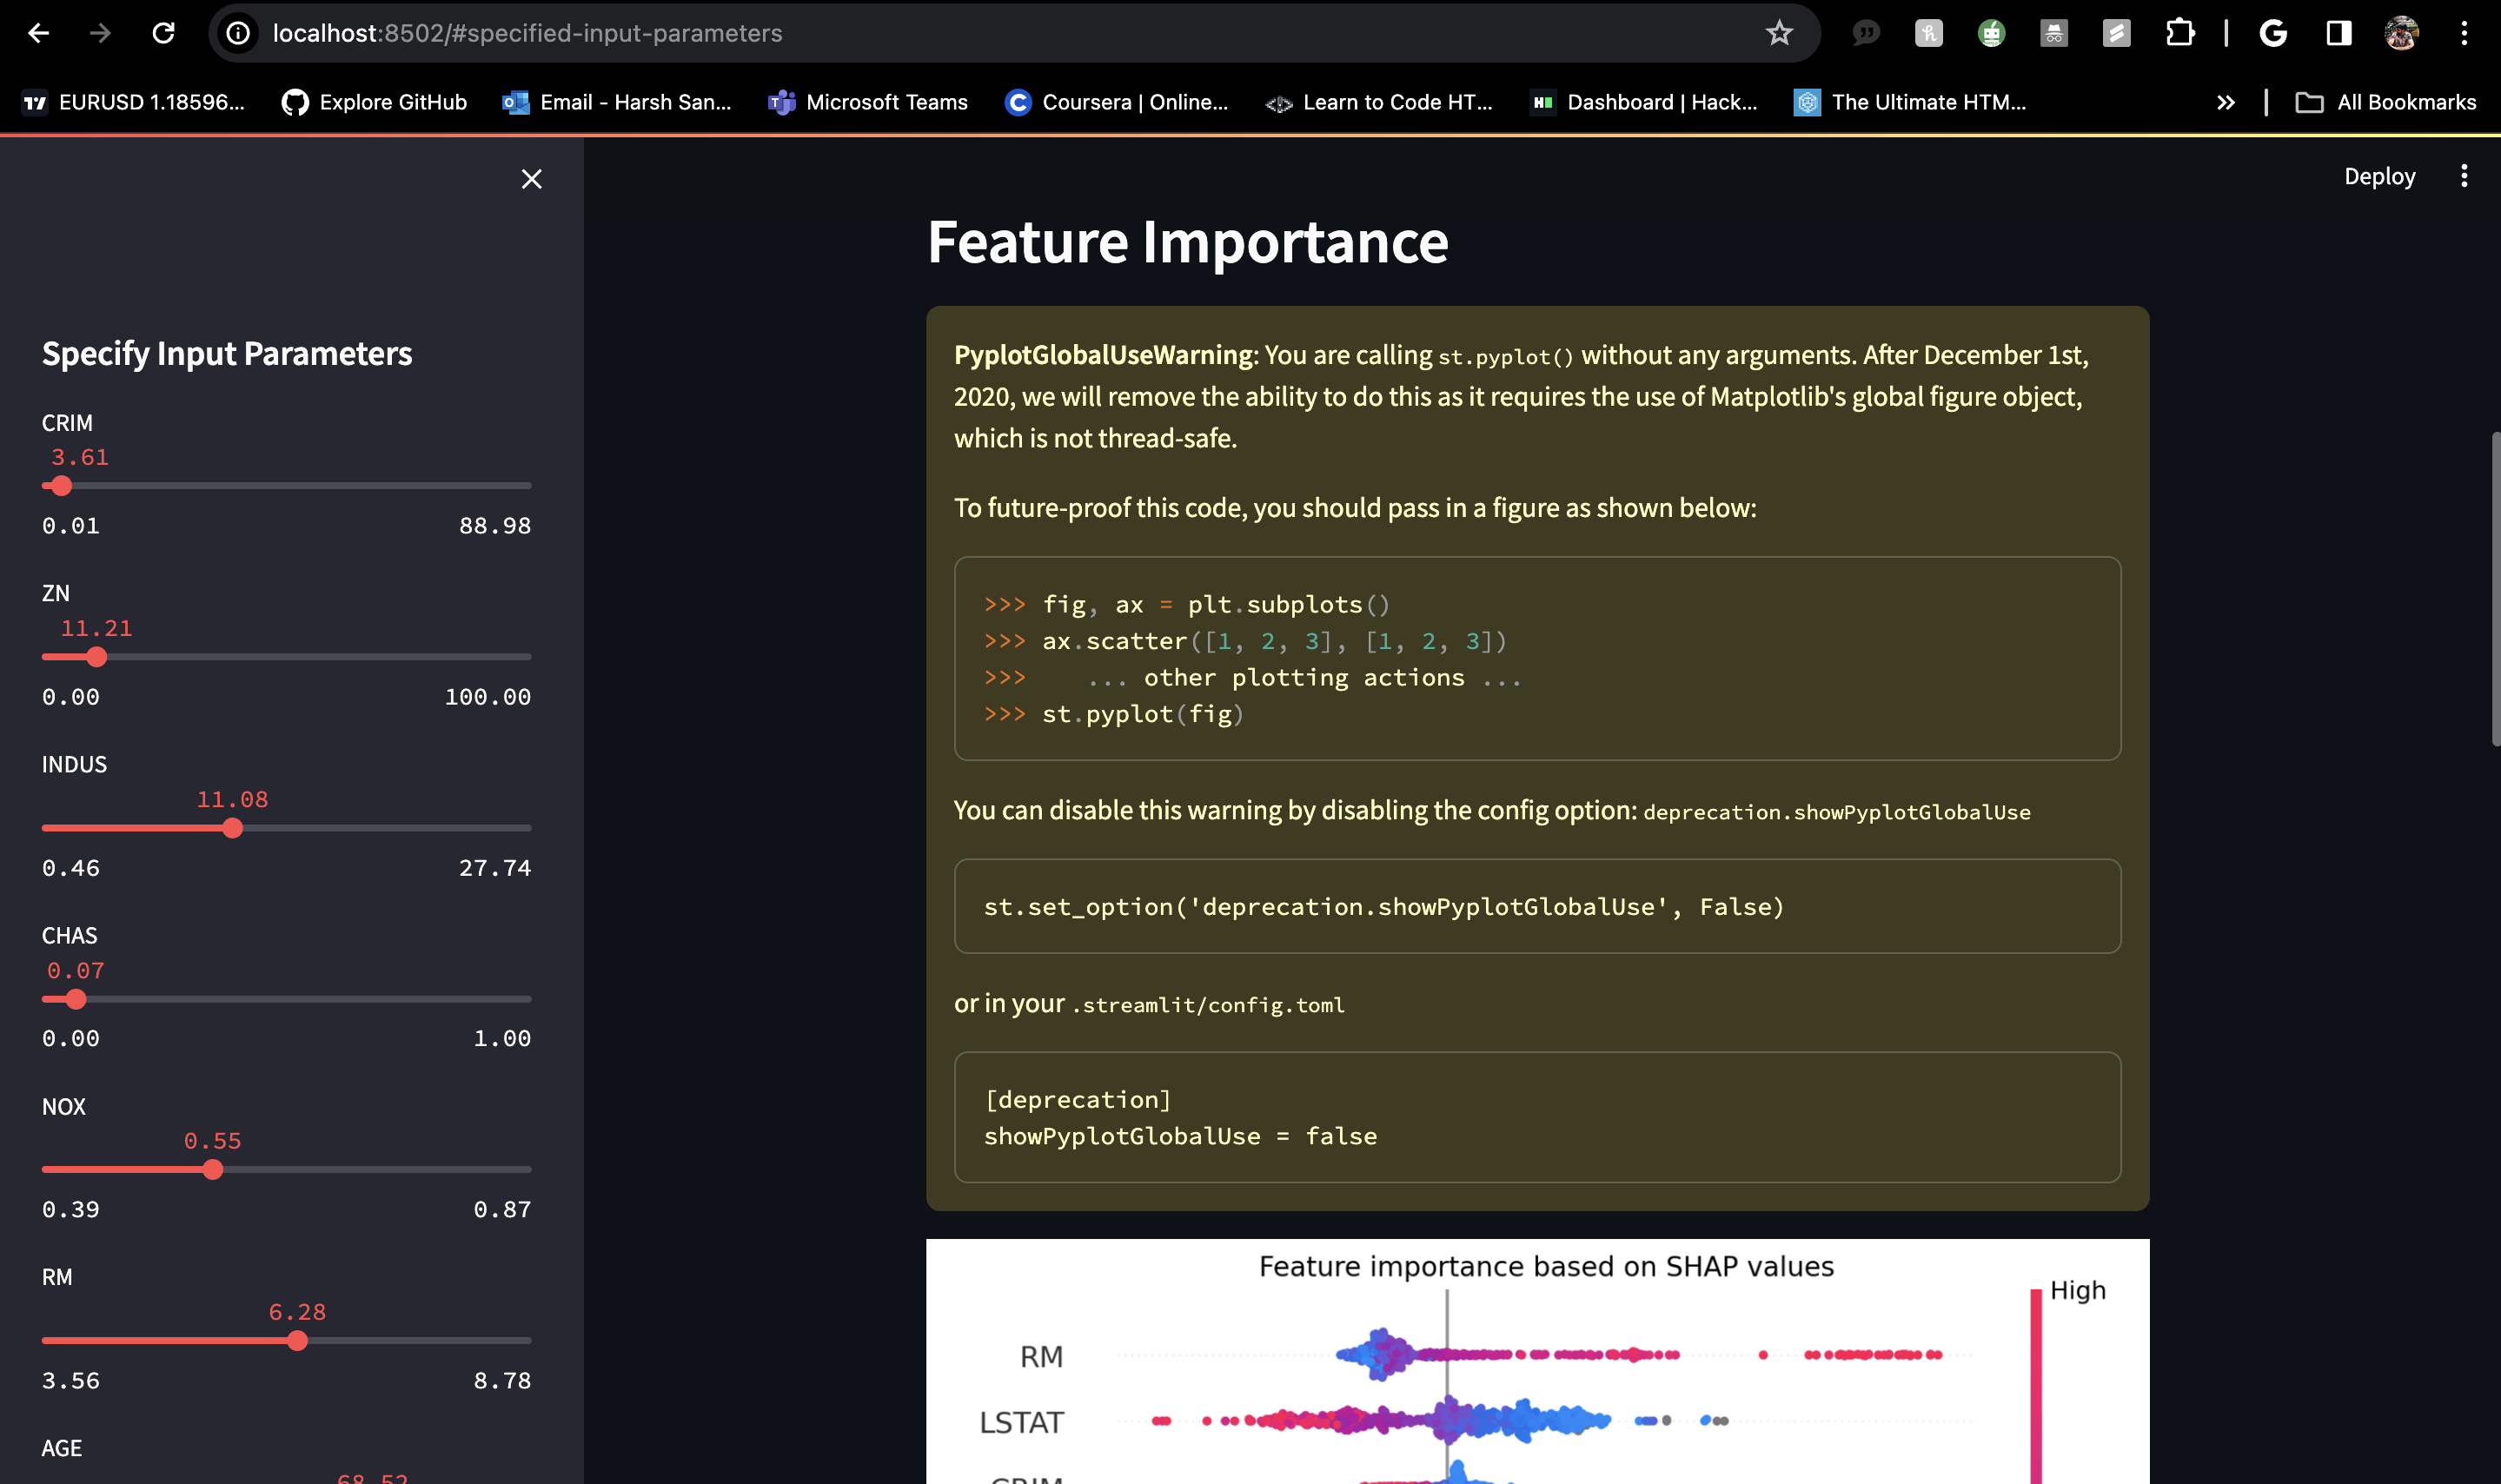

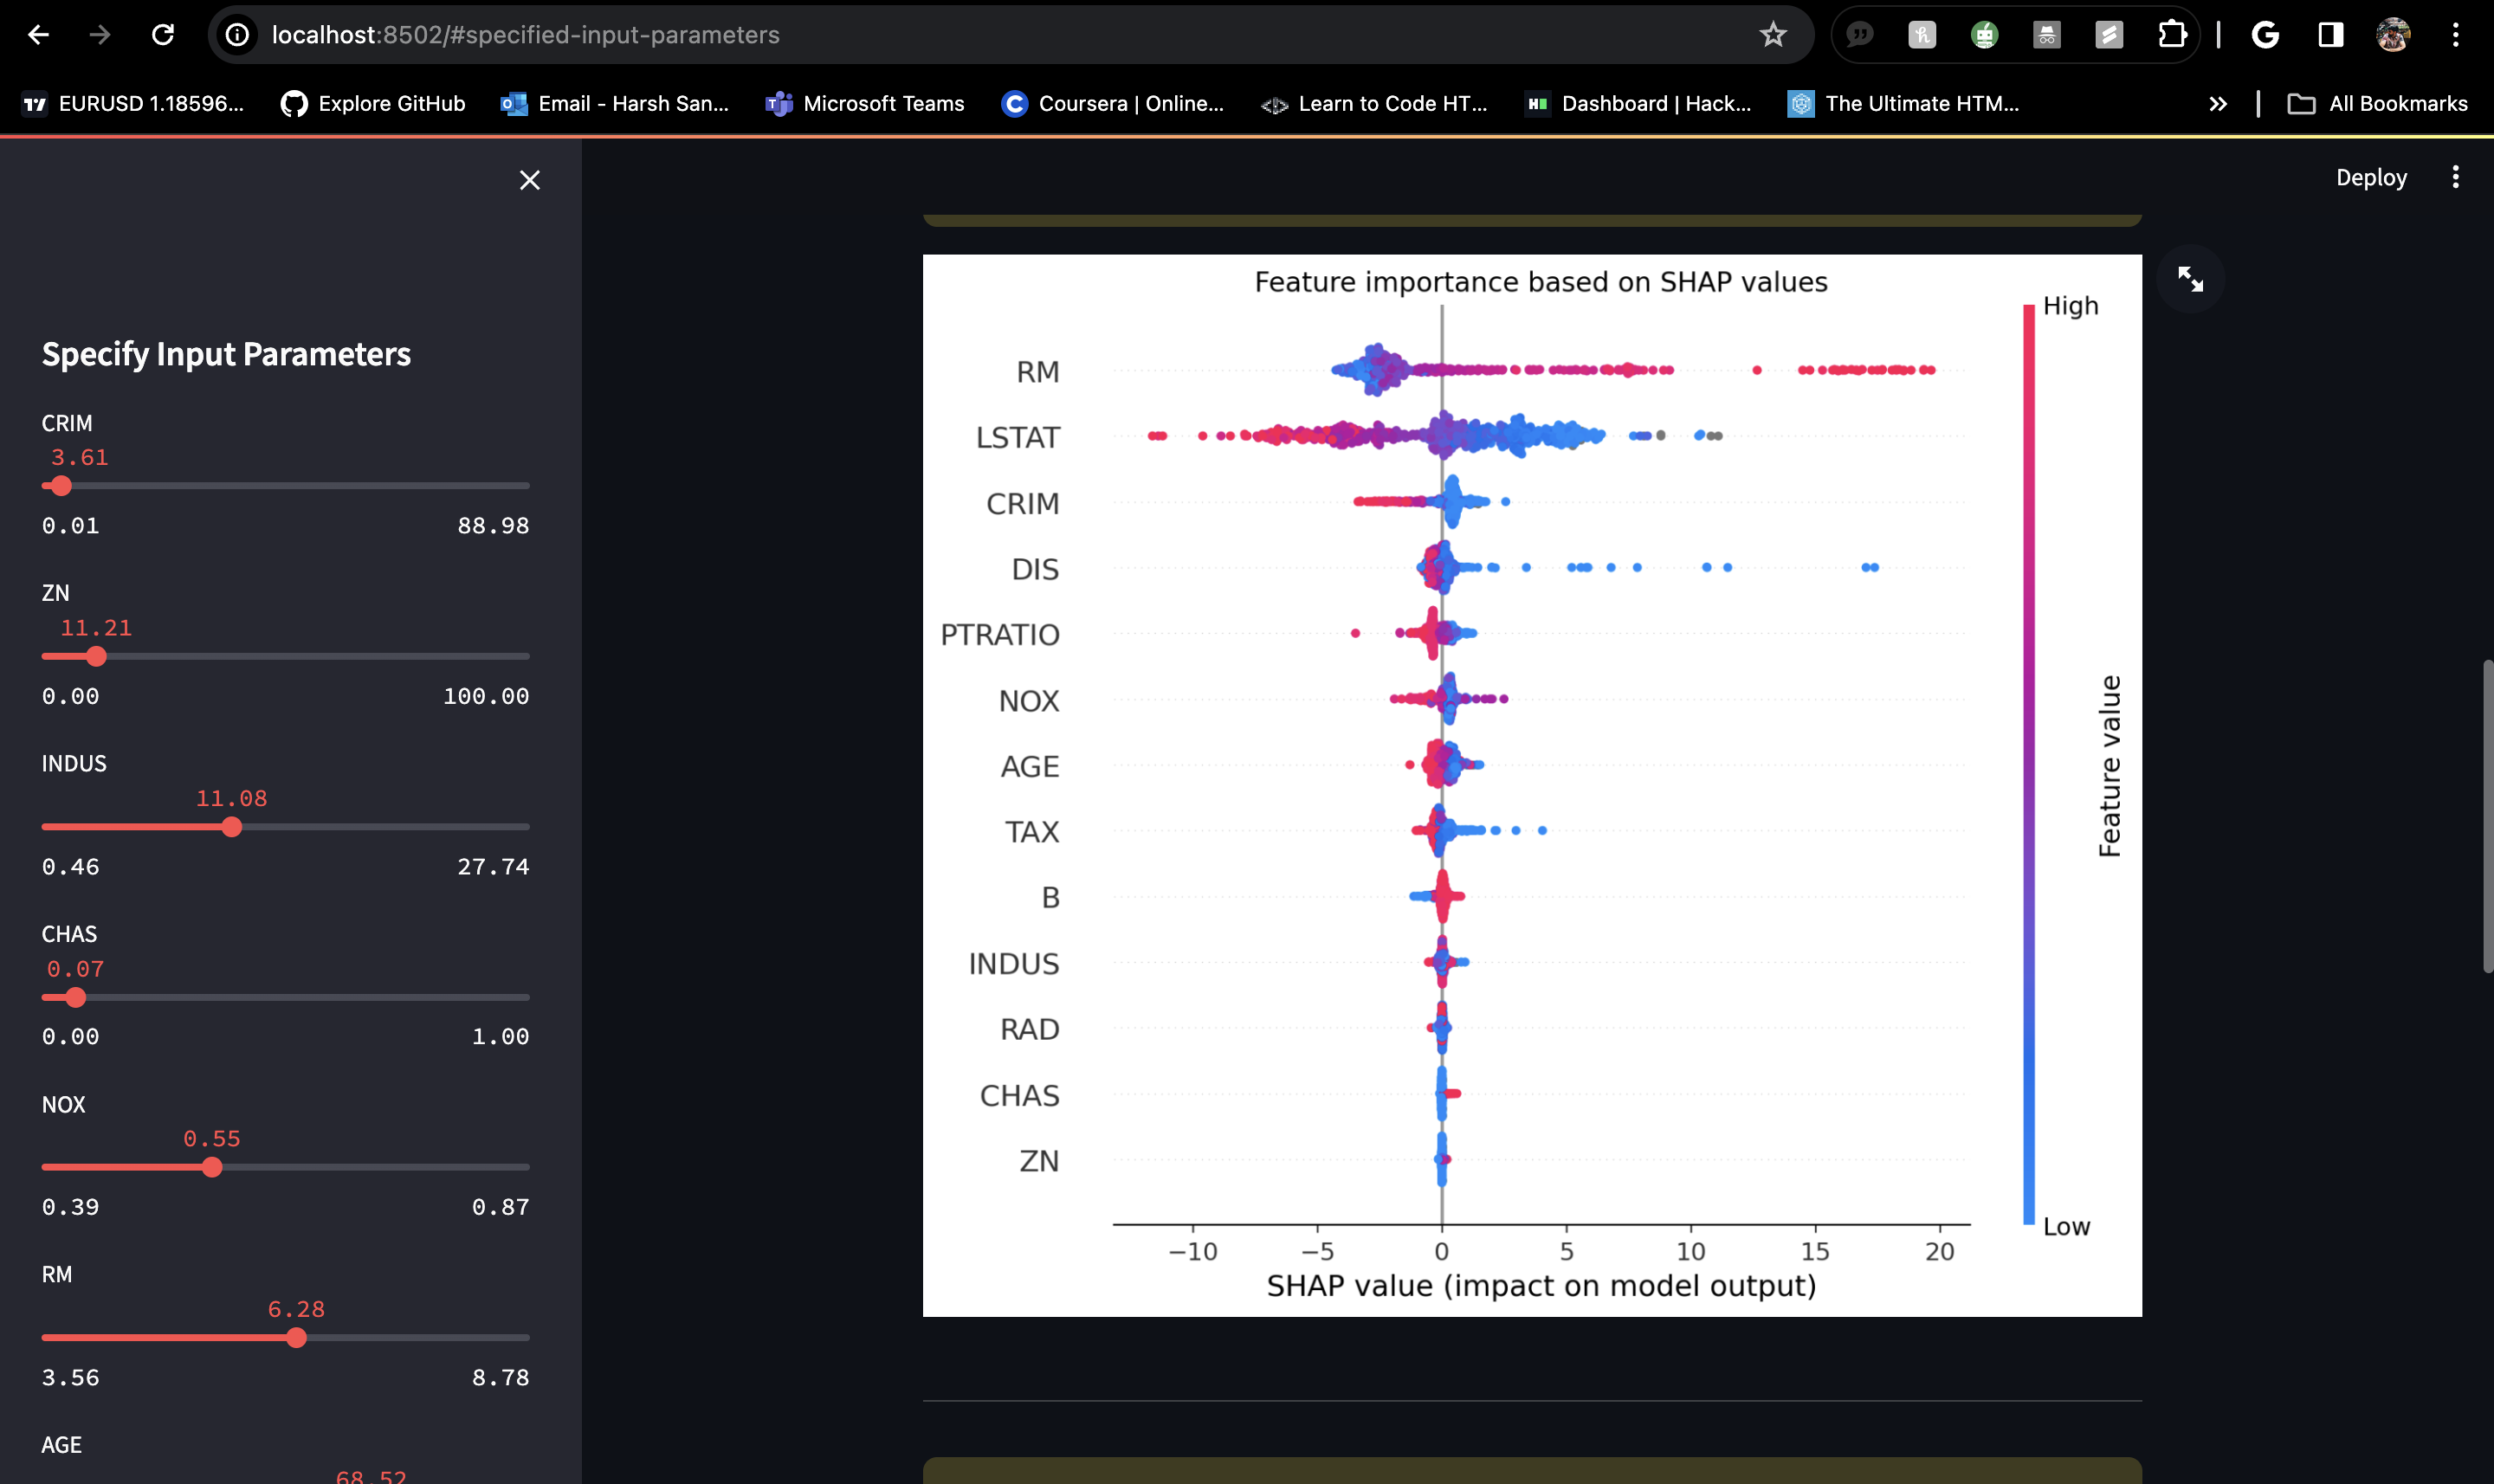

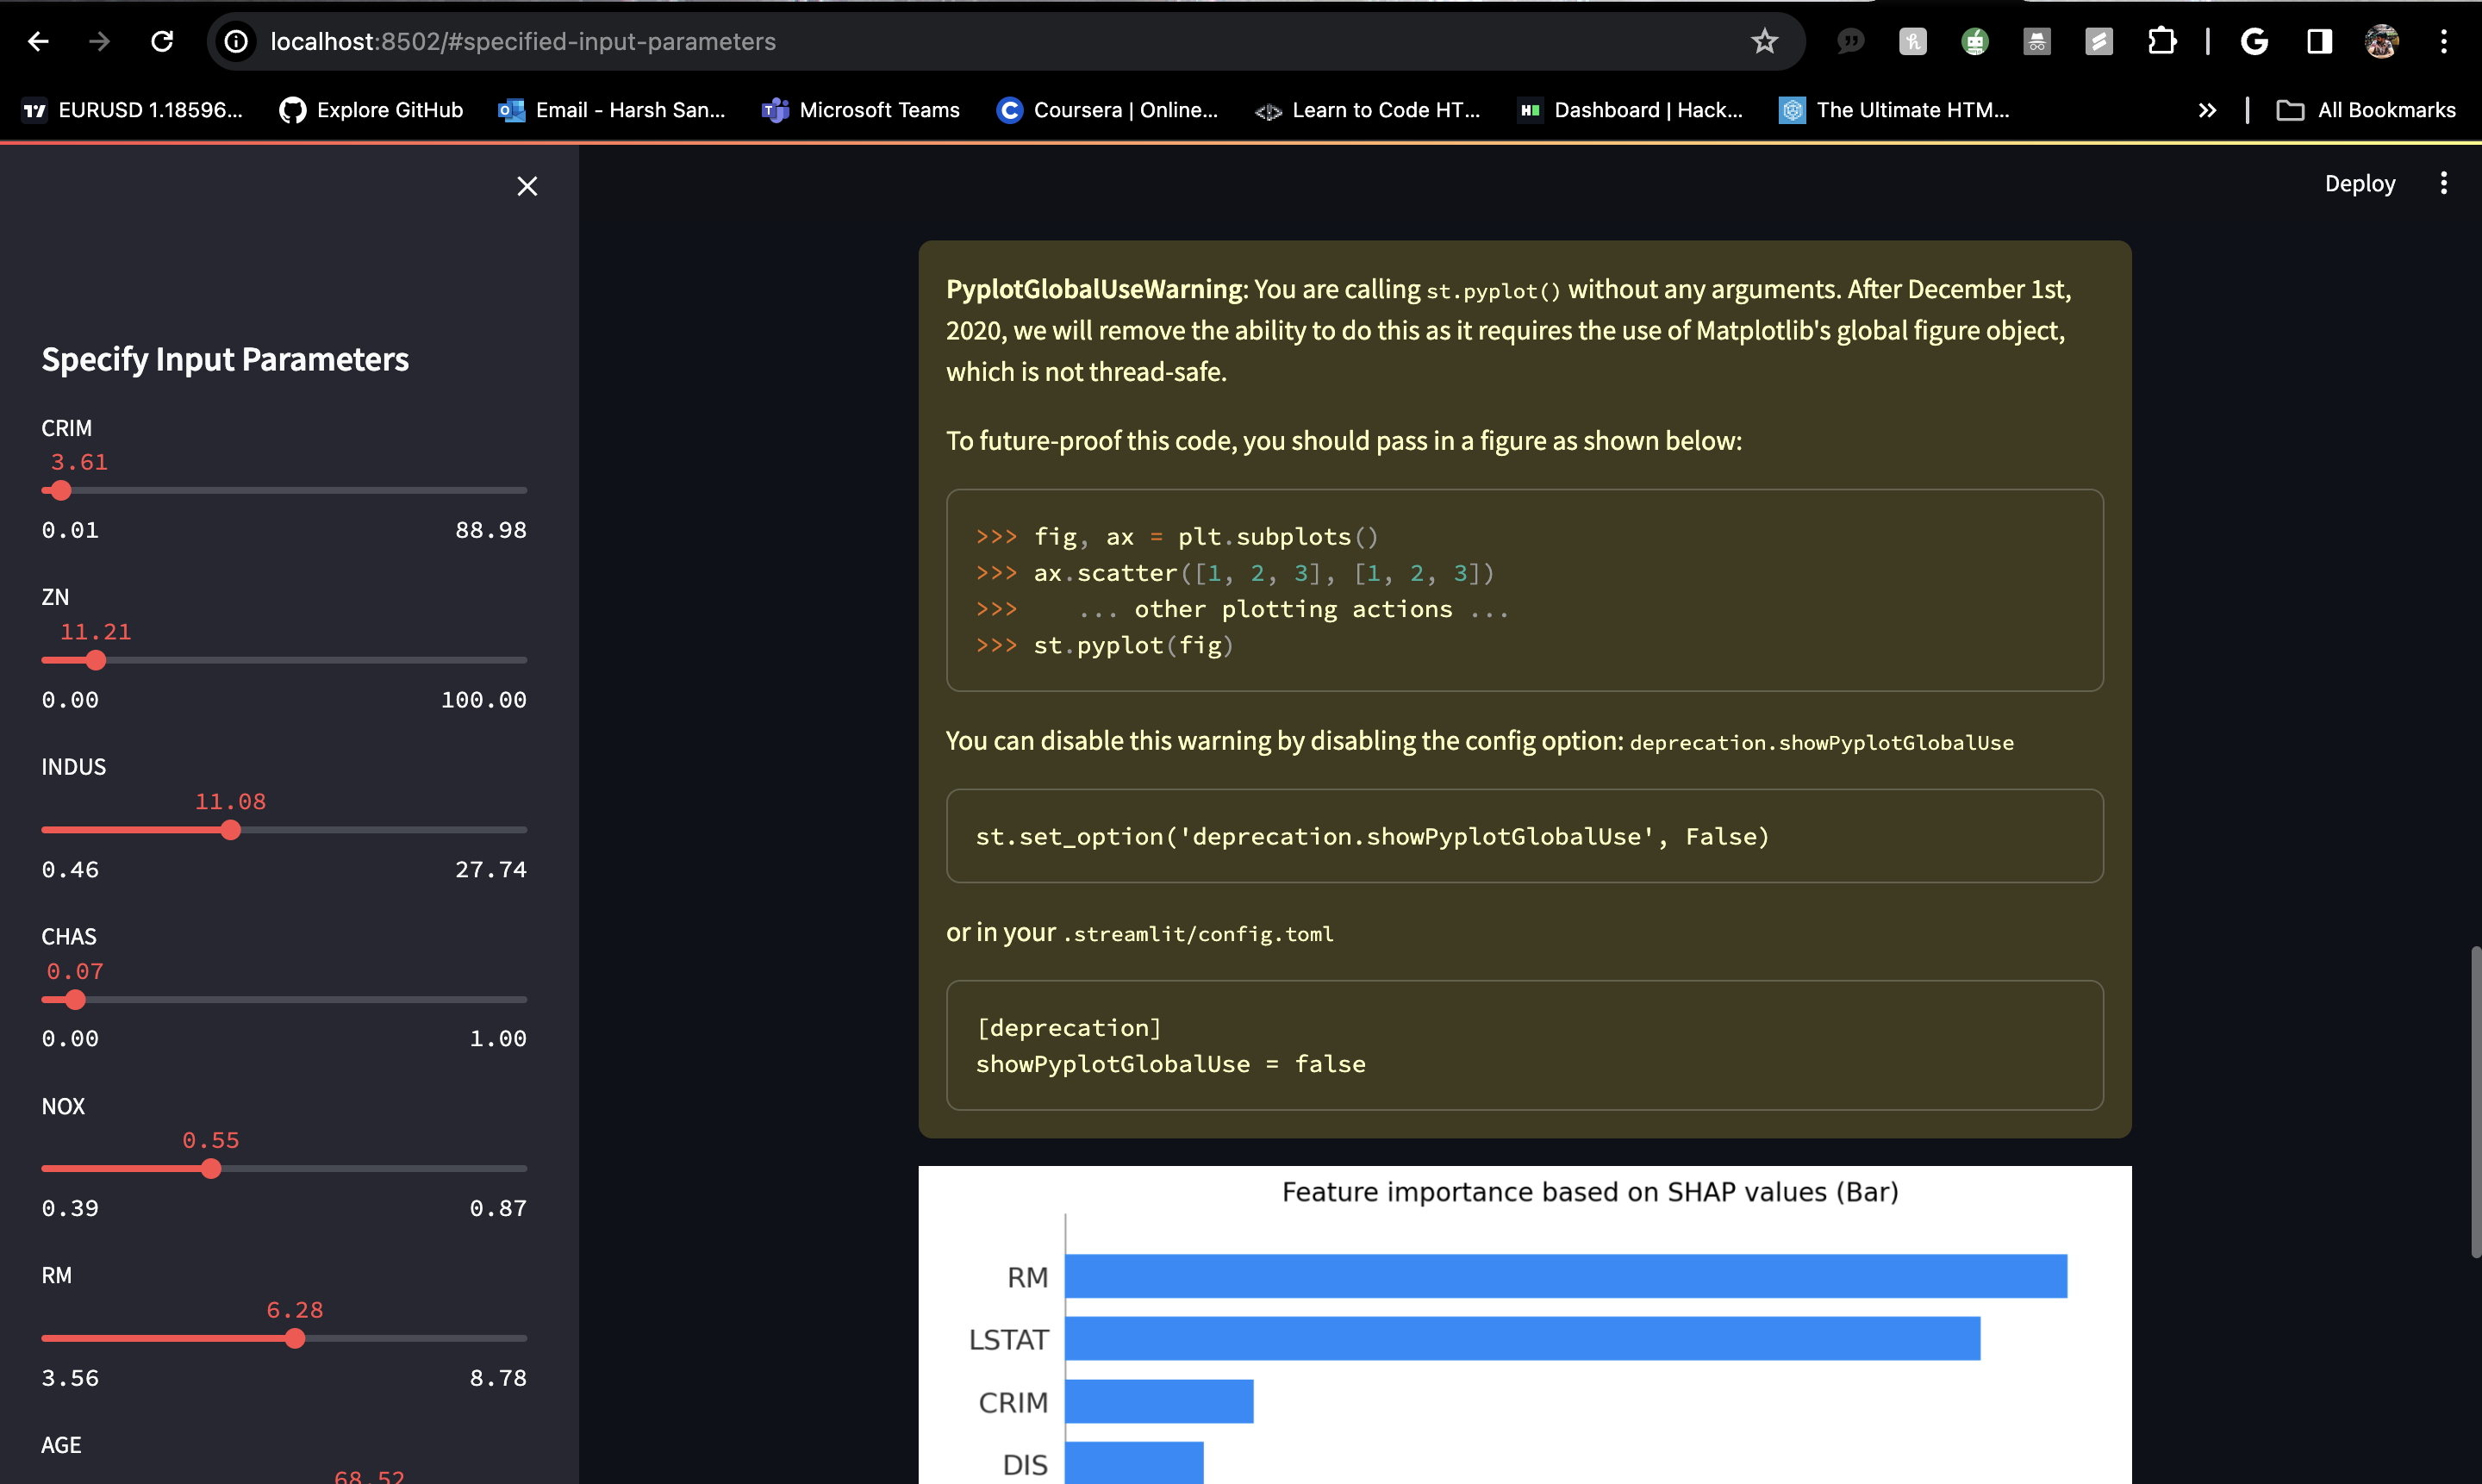

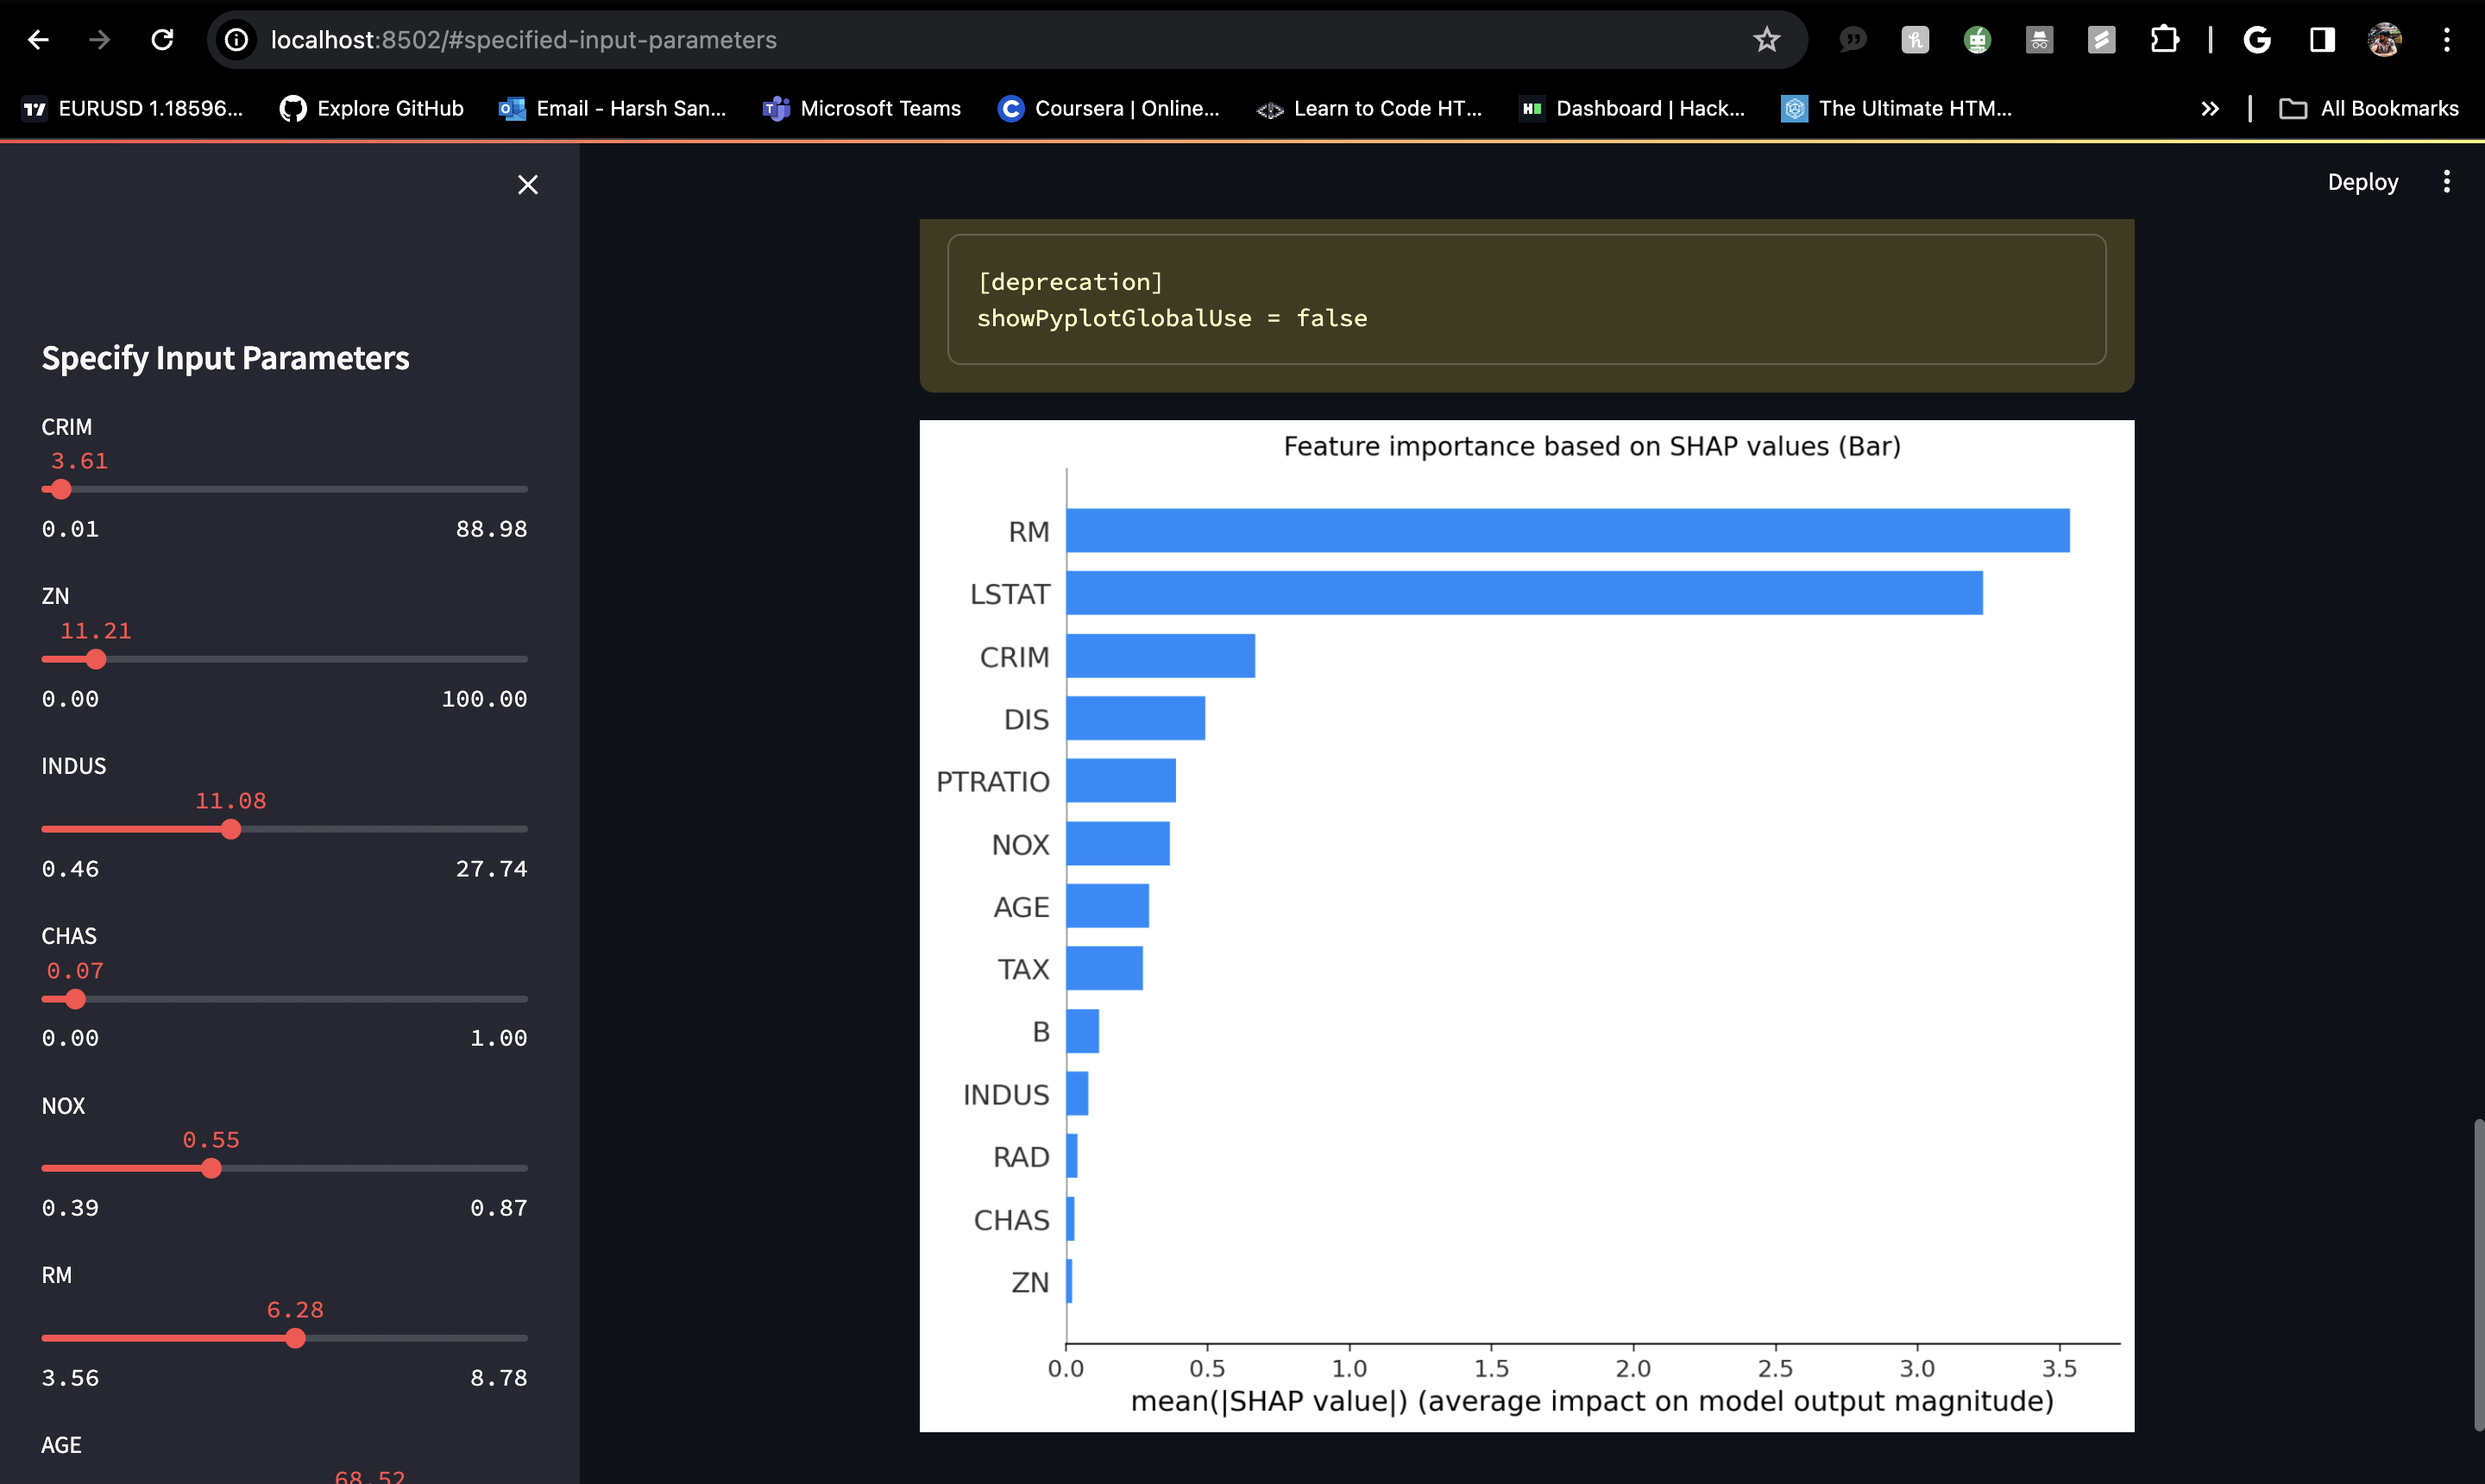

You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://10.0.0.97:8502

REFERENCES:

The following references cover various aspects of model interpretation, including linear models, tree-based models, AutoML, and SHAP analysis:

1. Interpreting Linear Model Coefficients:

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: with Applications in R. Springer.

2. Interpreting Tree-Based Model Nodes:

Breiman, L., Friedman, J., Olshen, R., & Stone, C. (1984). Classification and Regression Trees. CRC Press.

3. Using AutoML to Find the Best Model:

Feurer, M., Klein, A., Eggensperger, K., Springenberg, J. T., Blum, M., & Hutter, F. (2015). "Efficient and robust automated machine learning." In Advances in neural information processing systems, 2962-2970.

4. Running SHAP Analysis and Interpreting SHAP Values:

Lundberg, S. M., & Lee, S. I. (2017). "A Unified Approach to Interpreting Model Predictions." In Advances in neural information processing systems, 4765-4774.

MIT LICENSE:
MIT License

Copyright (c) 2024 Hunk0109

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.